In [6]:
import pandas as pd
file_path = 'C:/Users/tlcoz/Desktop/covid.csv' 
df = pd.read_csv(file_path)

In [13]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


In [41]:
df.shape

(429435, 67)

In [43]:
df.head(1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [35]:
df.columns.tolist()
df.dtypes
df.isnull().sum()

iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64

In [69]:
max_by_continent = df.groupby(["continent", "location"])["total_cases"].max()
max_by_continent

continent      location    
Africa         Algeria          272139.0
               Angola           107481.0
               Benin             28036.0
               Botswana         330696.0
               Burkina Faso      22139.0
                                 ...    
South America  Paraguay         735759.0
               Peru            4526977.0
               Suriname          82501.0
               Uruguay         1041346.0
               Venezuela        552695.0
Name: total_cases, Length: 243, dtype: float64

In [141]:
sum_by_continent = max_by_continent.groupby("continent").sum()
sum_by_continent

continent
Africa            13145540.0
Asia             301532347.0
Europe           252916868.0
North America    124492666.0
Oceania           15003352.0
South America     68809418.0
Name: total_cases, dtype: float64

In [139]:
total_world_cases = sum_max_by_continent.sum()
percentage_by_continent = (sum_max_by_continent / total_world_cases) * 100
print(percentage_by_continent)
results = pd.DataFrame ({
    "Total Cases" : sum_max_by_continent,
    "Percentage of World Total" : percentage_by_continent
})



continent
Africa            1.694231
Asia             38.862260
Europe           32.596572
North America    16.044933
Oceania           1.933670
South America     8.868334
Name: total_cases, dtype: float64


In [85]:
results

,Total Cases,Percentage of World Total
continent,,
Africa,13145540.0,1.694231
Asia,301532347.0,38.862260
Europe,252916868.0,32.596572
North America,124492666.0,16.044933
Oceania,15003352.0,1.933670
South America,68809418.0,8.868334


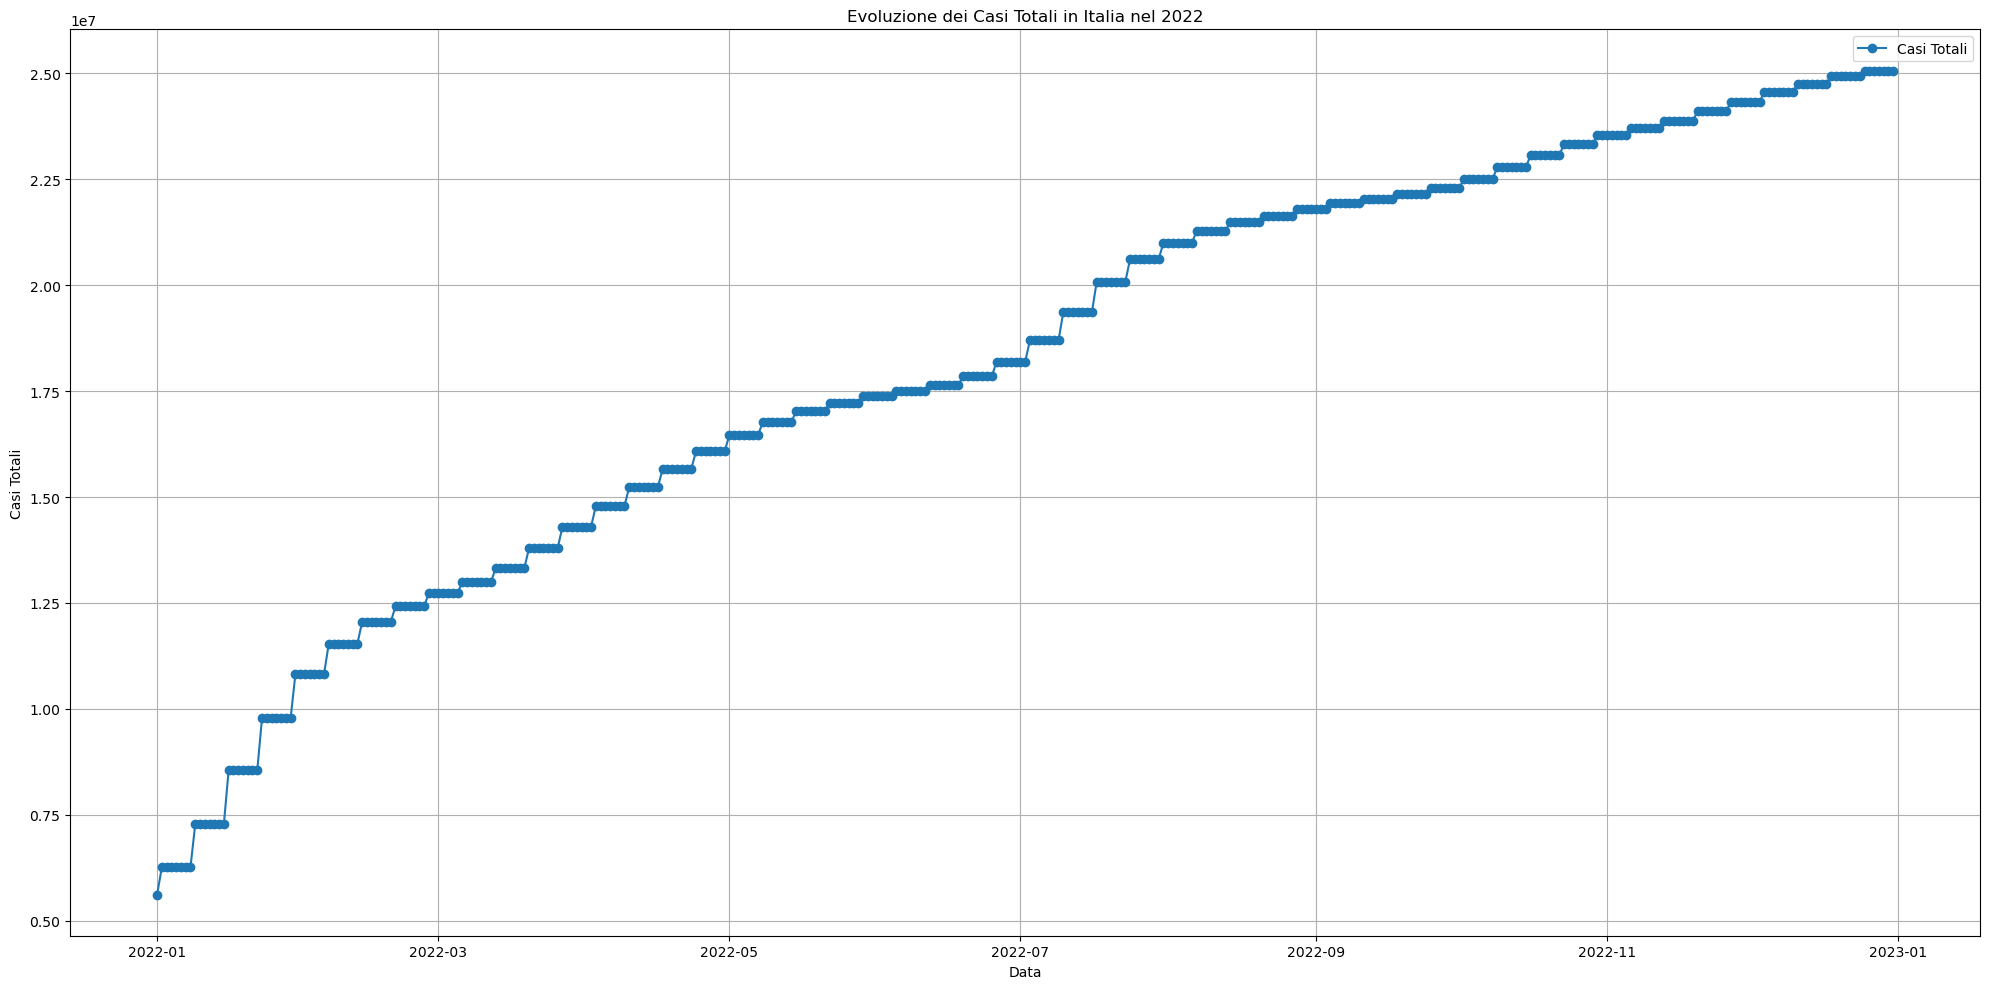

In [117]:
import matplotlib.pyplot as plt

italy_2022 = df[(df['location'] == 'Italy') & (df['date'].str.startswith('2022'))].copy()
italy_2022['date'] = pd.to_datetime(italy_2022['date'])
italy_2022 = italy_2022.sort_values(by='date')

plt.figure(figsize=(20, 10))
plt.plot(italy_2022['date'], italy_2022['total_cases'], marker='o', linestyle='-', label='Casi Totali')
plt.title('Evoluzione dei Casi Totali in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Casi Totali')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


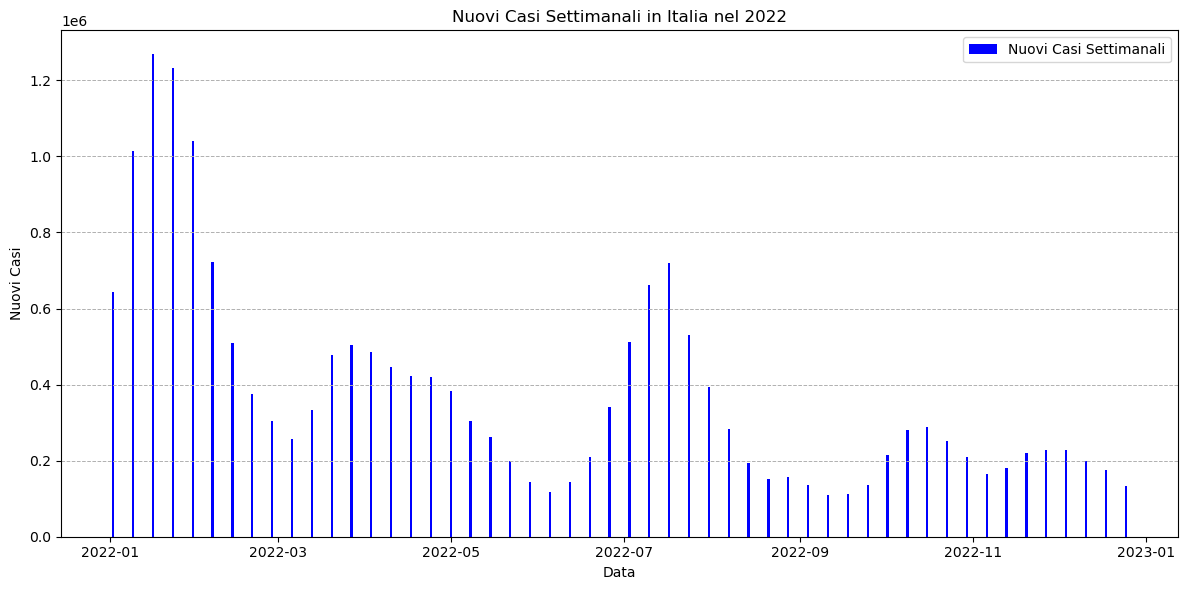

In [119]:
italy_2022 = df[(df['location'] == 'Italy') & (df['date'].str.startswith('2022'))].copy()
italy_2022['date'] = pd.to_datetime(italy_2022['date'])
italy_2022['new_cases'] = italy_2022['total_cases'].diff()

italy_weekly_cases = italy_2022.dropna(subset=['new_cases'])
italy_weekly_cases = italy_weekly_cases[italy_weekly_cases['new_cases'] > 0]


plt.figure(figsize=(12, 6))
plt.bar(italy_weekly_cases['date'], italy_weekly_cases['new_cases'], color='blue', label='Nuovi Casi Settimanali')
plt.title('Nuovi Casi Settimanali in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Nuovi Casi')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.legend()
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

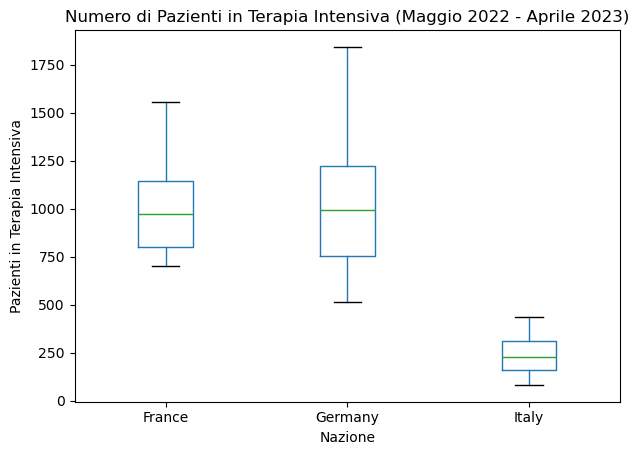

In [131]:
countries = ['Italy', 'Germany', 'France']
start_date = '2022-05-01'
end_date = '2023-04-30'

filtered_data = df[(df['location'].isin(countries)) & 
                     (df['date'] >= start_date) & (df['date'] <= end_date)].copy()

filtered_data['date'] = pd.to_datetime(filtered_data['date'])

plt.figure(figsize=(10, 6))
filtered_data.boxplot(column='icu_patients', by='location', grid=False)
plt.title('Numero di Pazienti in Terapia Intensiva (Maggio 2022 - Aprile 2023)')
plt.suptitle('')
plt.xlabel('Nazione')
plt.ylabel('Pazienti in Terapia Intensiva')
plt.tight_layout()
plt.show()

In [8]:
countries = ['Italy','Germany','France','Spain']
data_2023 = df[(df['location'].isin(countries)) & (df['date'].str.startswith('2023'))]

hospitalized_sum = data_2023.groupby('location')['weekly_hosp_admissions'].sum()
hospitalized_sum_df = hospitalized_sum.reset_index()
hospitalized_sum_df.columns = ['Country', 'Total Hospitalized Patients']
hospitalized_sum_df

,Country,Total Hospitalized Patients
0,France,268117.0
1,Germany,897776.0
2,Italy,592019.0
3,Spain,299463.0


In [145]:
null_counts = year_2023['hosp_patients'].isnull().sum()
print(f"Valori nulli nella colonna 'hosp_patients': {null_counts}")
null_percentage = (null_counts / len(year_2023)) * 100
print(f"Percentuale di valori nulli: {null_percentage:.2f}%")


Valori nulli nella colonna 'hosp_patients': 843
Percentuale di valori nulli: 57.74%
